# Chlorophyll-a time series
Time Series Analysis of chlorophyll-a concentration.

### importing modules

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import time
from matplotlib import rcParams
import cartopy
%matplotlib inline
rcParams['figure.figsize'] = (15,10)

### importing data

In [2]:
chl_df = pd.read_csv("https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chla8day_R202SQ.csv?chlor_a%5B(2004-02-22T00:00:00Z):1:(2012-02-22T00:00:00Z)%5D%5B(52.35416):1:(52.02083)%5D%5B(-175.7708):1:(-175.2708)%5D")

In [9]:
chl_df.loc[1:]

,time,latitude,longitude,chlor_a
1,2004-02-22T00:00:00Z,52.354164,-175.77083,0.36431733
2,2004-02-22T00:00:00Z,52.354164,-175.72917,0.36606562
3,2004-02-22T00:00:00Z,52.354164,-175.6875,0.3866254
4,2004-02-22T00:00:00Z,52.354164,-175.64583,0.38409266
5,2004-02-22T00:00:00Z,52.354164,-175.60417,0.35367963
...,...,...,...,...
36383,2012-02-22T00:00:00Z,52.020832,-175.4375,0.29411134
36384,2012-02-22T00:00:00Z,52.020832,-175.39583,0.2957206
36385,2012-02-22T00:00:00Z,52.020832,-175.35417,0.29755464
36386,2012-02-22T00:00:00Z,52.020832,-175.3125,0.29755464


In [10]:
def stamptodate(x):
    return time.mktime(dt.strptime(x[:10], "%Y-%m-%d").timetuple())

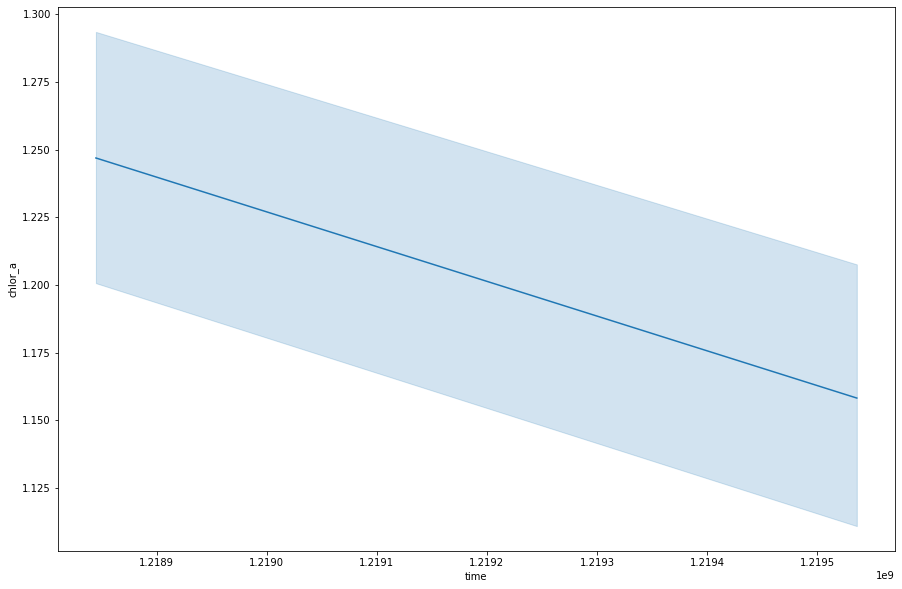

In [78]:
ax = sns.lineplot(x = chl_df.loc[1:].time[chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0-20*86400, 1218067200.0+21*86400)].apply(stamptodate),
                  y = chl_df.loc[1:]["chlor_a"].astype(float))
ax.set_figsize = (15,10)

In [79]:
print(f"NaN values are {len(chl_df.loc[1:][chl_df.loc[1:].chlor_a.isna()])/len(chl_df)*100} % of the total values.")

NaN values are 64.15851379575685 % of the total values.


Astonishingly high NaNs, isn't it? Let us look at dates at which entries are non-NaN.

In [58]:
chl_df.loc[1:][chl_df.loc[1:].chlor_a.notna()].time.unique()

array(['2004-02-22T00:00:00Z', '2004-03-01T00:00:00Z',
       '2004-03-09T00:00:00Z', '2004-03-17T00:00:00Z',
       '2004-03-25T00:00:00Z', '2004-04-02T00:00:00Z',
       '2004-04-10T00:00:00Z', '2004-04-18T00:00:00Z',
       '2004-04-26T00:00:00Z', '2004-05-04T00:00:00Z',
       '2004-05-12T00:00:00Z', '2004-05-20T00:00:00Z',
       '2004-06-05T00:00:00Z', '2004-06-13T00:00:00Z',
       '2004-06-21T00:00:00Z', '2004-06-29T00:00:00Z',
       '2004-07-15T00:00:00Z', '2004-07-23T00:00:00Z',
       '2004-08-08T00:00:00Z', '2004-08-16T00:00:00Z',
       '2004-09-09T00:00:00Z', '2004-09-17T00:00:00Z',
       '2004-09-25T00:00:00Z', '2004-10-03T00:00:00Z',
       '2004-10-11T00:00:00Z', '2004-10-19T00:00:00Z',
       '2004-10-27T00:00:00Z', '2004-11-04T00:00:00Z',
       '2005-01-29T00:00:00Z', '2005-02-06T00:00:00Z',
       '2005-02-14T00:00:00Z', '2005-02-22T00:00:00Z',
       '2005-03-02T00:00:00Z', '2005-03-10T00:00:00Z',
       '2005-03-18T00:00:00Z', '2005-03-26T00:00:00Z',
       '20

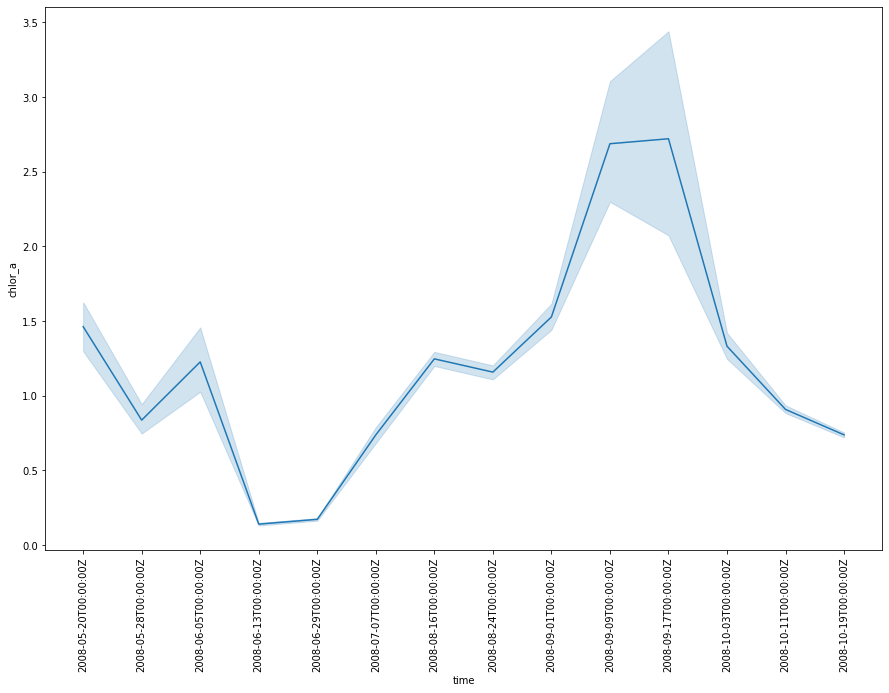

In [80]:
ax = sns.lineplot(x = chl_df[chl_df.time.isin(['2008-05-20T00:00:00Z', '2008-05-28T00:00:00Z',
       '2008-06-05T00:00:00Z', '2008-06-13T00:00:00Z',
       '2008-06-29T00:00:00Z', '2008-07-07T00:00:00Z',
       '2008-08-16T00:00:00Z', '2008-08-24T00:00:00Z',
       '2008-09-01T00:00:00Z', '2008-09-09T00:00:00Z',
       '2008-09-17T00:00:00Z', '2008-10-03T00:00:00Z',
       '2008-10-11T00:00:00Z', '2008-10-19T00:00:00Z',])].time,
             y = chl_df[chl_df.time.isin(['2008-05-20T00:00:00Z', '2008-05-28T00:00:00Z',
       '2008-06-05T00:00:00Z', '2008-06-13T00:00:00Z',
       '2008-06-29T00:00:00Z', '2008-07-07T00:00:00Z',
       '2008-08-16T00:00:00Z', '2008-08-24T00:00:00Z',
       '2008-09-01T00:00:00Z', '2008-09-09T00:00:00Z',
       '2008-09-17T00:00:00Z', '2008-10-03T00:00:00Z',
       '2008-10-11T00:00:00Z', '2008-10-19T00:00:00Z',])].chlor_a.astype(float),
            )
plt.xticks(rotation=90);

#### Let us see the spatial variation of these points

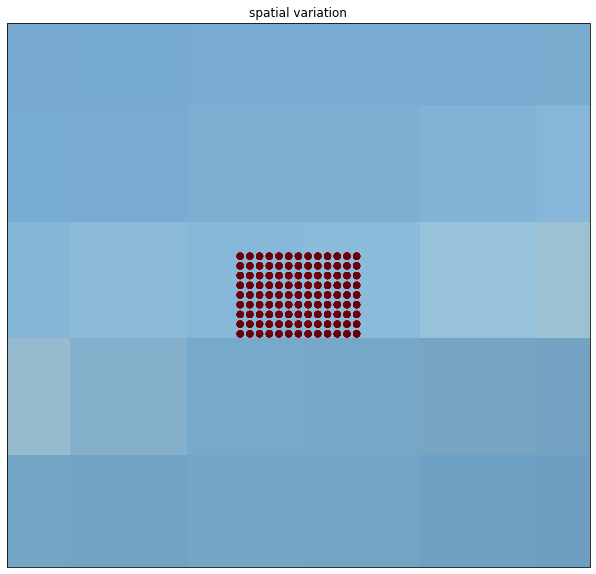

In [94]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x=chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].longitude.astype(float),
           y=chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].latitude.astype(float),
           c = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
           cmap="Reds",
           transform=cartopy.crs.PlateCarree()
          )
ax.set_xlim(chl_df.loc[1:].longitude.astype(float).min()-1,chl_df.loc[1:].longitude.astype(float).max()+1 )
ax.set_ylim(chl_df.loc[1:].latitude.astype(float).min()-1,chl_df.loc[1:].latitude.astype(float).max()+1 )

ax.set_title("spatial variation")
plt.show()

These points are distributed equally over time, and thus there is no point of smapling/coverage bias.

### time-series analysis

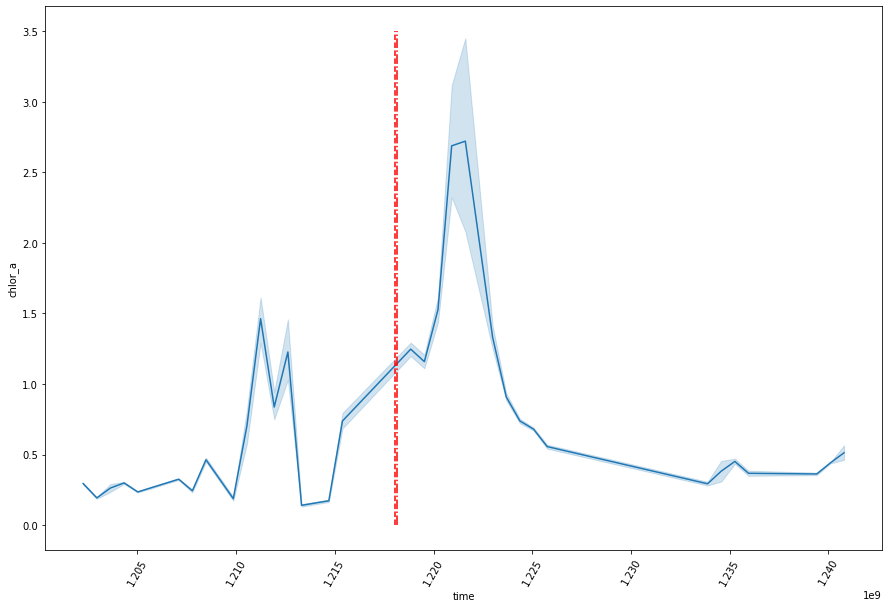

In [104]:
ax = sns.lineplot(x = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270 *86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
             y = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].chlor_a.astype(float),
            )
plt.plot([stamptodate("2008-08-07")]*2,[0,3.5], color="red", linestyle="--")
plt.plot([stamptodate("2008-08-08")]*2,[0,3.5], color="red", linestyle="-.")
plt.xticks(rotation=60);

### Findings
+ We can put a data story contrasting the spike and the trough that post-eruption, phytoplankton density might have increased by a huge margin which stabilised later on to normal levels.
+ We can put a geospatial heatmap of chl-a concentration contrasting those two points (peak and trough).